# About Dataset

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The data sets contains transactions made by credit cards by cardholders. This dataset we have found 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the frauds account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA is Time and Amount. Feature Time contains the seconds between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Time
Number of seconds elapsed between this transaction and the first transaction in the dataset
V1….V28
may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
Amount
Transaction amount
Class
The value 1 is for fraudulent transactions, value 0 is for nonfraudulent transactions

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [47]:
data=pd.read_csv("C:\\Users\\aatif\\Downloads\\creditcard.csv.zip")

In [84]:
credit_df=data.copy()
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [85]:
credit_df.shape

(284807, 31)

In [49]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
credit_df = credit_df.astype("int32")

In [51]:
credit_df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [52]:
credit_df['Class'].value_counts(normalize=True)


0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
#Preprocessing - first step finding missing value

In [53]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Here we can see there is no null value in the data set

In [54]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Time    284807 non-null  int32
 1   V1      284807 non-null  int32
 2   V2      284807 non-null  int32
 3   V3      284807 non-null  int32
 4   V4      284807 non-null  int32
 5   V5      284807 non-null  int32
 6   V6      284807 non-null  int32
 7   V7      284807 non-null  int32
 8   V8      284807 non-null  int32
 9   V9      284807 non-null  int32
 10  V10     284807 non-null  int32
 11  V11     284807 non-null  int32
 12  V12     284807 non-null  int32
 13  V13     284807 non-null  int32
 14  V14     284807 non-null  int32
 15  V15     284807 non-null  int32
 16  V16     284807 non-null  int32
 17  V17     284807 non-null  int32
 18  V18     284807 non-null  int32
 19  V19     284807 non-null  int32
 20  V20     284807 non-null  int32
 21  V21     284807 non-null  int32
 22  V22     284807 non-n

In [55]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.052716,-0.028209,-0.047130,0.027738,0.022222,0.121647,-0.016394,-0.048584,0.020912,...,0.014736,0.009301,0.005109,-0.049258,-0.013841,0.024891,-0.009845,-0.003834,87.869652,0.001727
std,47488.145955,1.685854,1.422886,1.203511,1.100334,1.127747,1.062791,1.019071,1.048267,0.806517,...,0.614487,0.420479,0.515722,0.324531,0.255082,0.221827,0.288958,0.249377,250.148683,0.041527
min,0.000000,-56.000000,-72.000000,-48.000000,-5.000000,-113.000000,-26.000000,-43.000000,-73.000000,-13.000000,...,-34.000000,-10.000000,-44.000000,-2.000000,-10.000000,-2.000000,-22.000000,-15.000000,0.000000,0.000000
25%,54201.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,84692.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000
75%,139320.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,0.000000
max,172792.000000,2.000000,22.000000,9.000000,16.000000,34.000000,73.000000,120.000000,20.000000,15.000000,...,27.000000,10.000000,22.000000,4.000000,7.000000,3.000000,31.000000,33.000000,25691.000000,1.000000


<AxesSubplot:>

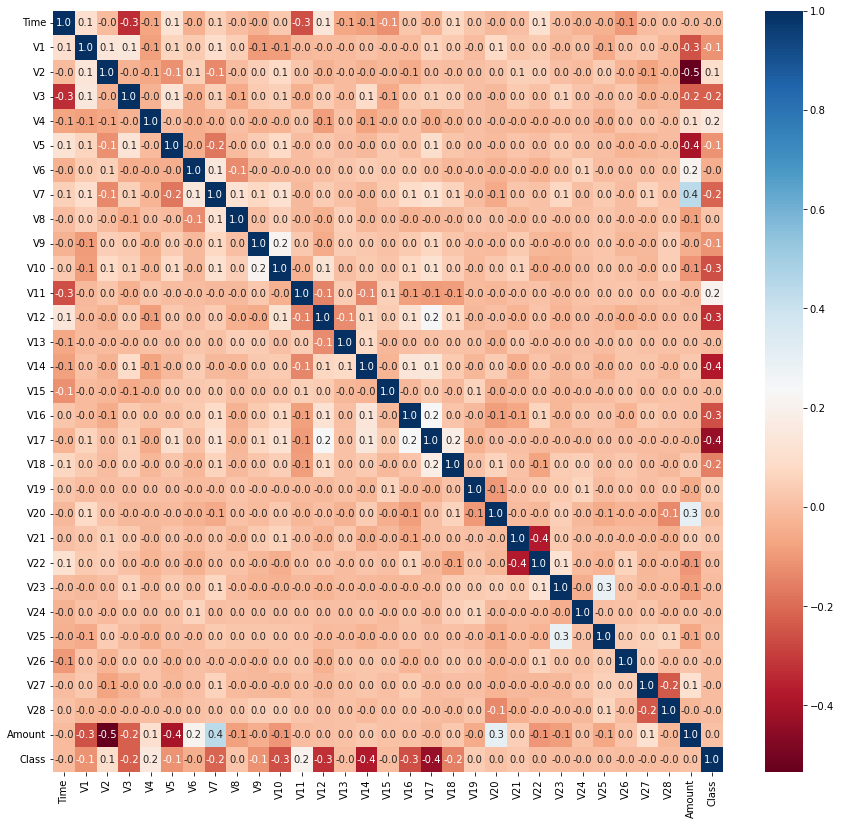

In [56]:
plt.figure(figsize=(15,14))
sns.heatmap(credit_df.corr(), annot=True, fmt=".1f",cmap="RdBu")

<Figure size 576x360 with 0 Axes>

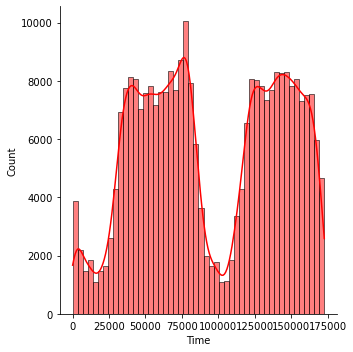

In [57]:
plt.figure(figsize=(8,5))
sns.displot(credit_df['Time'],kde=True,bins=50,color='red')

<AxesSubplot:xlabel='Amount'>

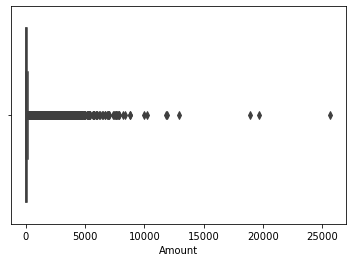

In [60]:
sns.boxplot(credit_df['Amount'],orient='h')

<AxesSubplot:xlabel='Time'>

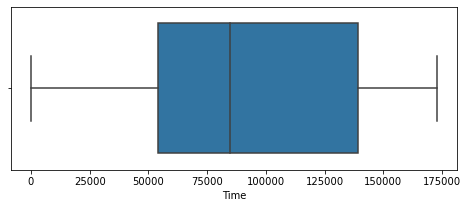

In [61]:
plt.figure(figsize=(8,3))
sns.boxplot(credit_df['Time'])

Text(0.5, 1.0, 'Countplot of Target Variable')

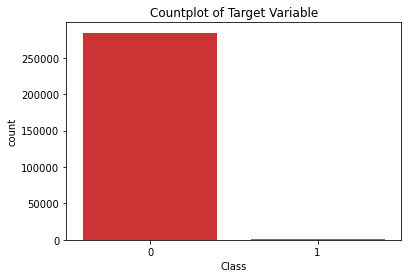

In [62]:
sns.countplot(credit_df["Class"],palette="Set1")
plt.title("Countplot of Target Variable")

In [17]:
# Robustscaler is applied to resolve the outliers

In [63]:
from sklearn.preprocessing import RobustScaler
rbst=RobustScaler()

In [64]:
credit_df['Amount']=rbst.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['Time']=rbst.fit_transform(credit_df['Time'].values.reshape(-1,1))

In [20]:
# split the data into training and test

In [65]:
X=credit_df.drop('Class',axis=1)
y=credit_df['Class']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

SMOTE
For handling class imbalance

In [68]:
smote=SMOTE(random_state=24)
X_smote,y_smote=smote.fit_resample(X_train,y_train)

Model Training


In [69]:
from sklearn .linear_model import LogisticRegression

In [70]:
lg=LogisticRegression()

In [71]:
lg.fit(X_smote,y_smote)

LogisticRegression()

In [72]:
y_pred=lg.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.9776517678452301


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [75]:
result=classification_report(y_pred,y_test)
print(result)
print(f"ROC AUC Score for logistic regression: {roc_auc_score(y_pred,y_test)}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55610
           1       0.88      0.07      0.13      1352

    accuracy                           0.98     56962
   macro avg       0.93      0.53      0.56     56962
weighted avg       0.98      0.98      0.97     56962

ROC AUC Score for logistic regression: 0.5335459518902245


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier()

In [79]:
rf.fit(X_smote,y_smote)

RandomForestClassifier()

In [80]:
ypred1=rf.predict(X_test)

In [81]:
accuracy1=accuracy_score(y_test,ypred1)
print(accuracy1)

0.9980513324672589


In [82]:
result1 = classification_report(ypred1, y_test)
print(result1)
print(f"Accuracy: {accuracy_score(ypred1, y_test)}")
print(f"ROC AUC Score for Random Forest Classifier: {roc_auc_score(ypred1, y_test)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56782
           1       0.83      0.48      0.61       180

    accuracy                           1.00     56962
   macro avg       0.92      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9980513324672589
ROC AUC Score for Random Forest Classifier: 0.7387391935629053


<AxesSubplot:>

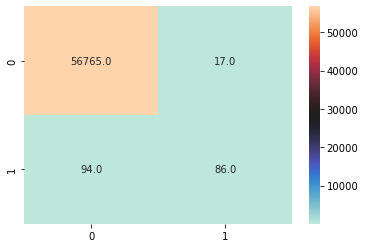

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred1,y_test)
sns.heatmap(cm, annot=True, fmt=".1f", cmap="icefire")